In [131]:
import yfinance as yf

ticker ="EURUSD=X"#Label the ticker symbol

df = yf.download(ticker, period='max', interval='1d')#Put the period to max to get all data
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_12036\876554111.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='max', interval='1d')#Put the period to max to get all data
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X
Date,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0
2003-12-02,1.208897,1.210903,1.194600,1.196101,0
2003-12-03,1.212298,1.213003,1.207700,1.209000,0
2003-12-04,1.208094,1.214403,1.204398,1.212004,0
2003-12-05,1.218695,1.219096,1.206593,1.207802,0
...,...,...,...,...,...
2025-12-19,1.172567,1.173750,1.170412,1.172539,0
2025-12-22,1.170809,1.177024,1.171084,1.171084,0


In [132]:
import matplotlib.pyplot as plt

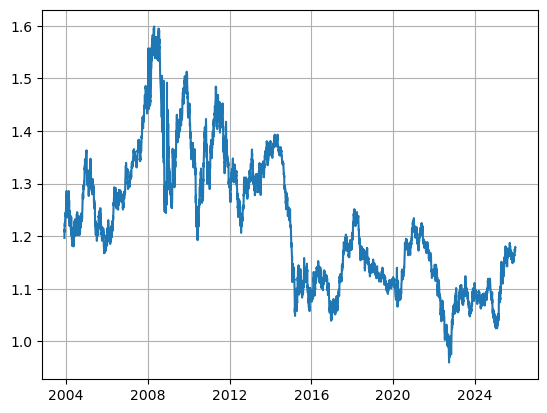

In [133]:
plt.plot(df['Close'])
plt.grid(True)

1. df.sort_index()
This part of the command tells pandas to sort the rows of your DataFrame (df) based on its index. In your case, the index for your financial data is the Date.

So, this function arranges all the rows in your dataset in chronological order, from the oldest date to the most recent. This is critical for calculations like moving averages, which rely on the data being in the correct time sequence.

2. inplace=True
This is an important argument that modifies how the function behaves.

inplace=True: This means "modify the DataFrame directly in its current place in memory." It sorts df without creating a new copy. After the command runs, your original df is now sorted.

Without inplace=True (the default is False): The function would return a new, sorted copy of the DataFrame, leaving your original df unchanged. To save the sorted data in that case, you would have to assign it back, like this: df = df.sort_index()

In [134]:
df.sort_index(inplace=True)

The Challenge: Handling NaN Values and Multi-Index Columns
When first attempting to calculate the moving average using df['Close'].rolling(2).mean(), the 'MA' column was filled entirely with NaN (Not a Number) values. This happened for two main reasons:

Expected NaN: A rolling mean with a window of 2 requires two data points. The very first row has no preceding data to average with, so its result will always be NaN. This is normal.
Multi-Index Column Issue: The primary issue was that the DataFrame returned by yfinance had a multi-level (or hierarchical) column index. The column names were organized in levels (e.g., a top-level for the price type like 'Close' and a second level for the ticker like 'SPY'). Simply using df['Close'] was not specific enough to select the single column of numeric data needed for the calculation, causing the operation to fail and return NaN for all rows.
The Solution

Sort the DataFrame: Time-series calculations require the data to be in chronological order. We first sort the DataFrame by its index (the date).
Use a Tuple for Selection: To select the correct column from the multi-level index, we provide a tuple ('Close', 'SPY') that specifies the exact "path" to the data. This tells pandas to find the 'Close' column at the top level, and then the 'SPY' column at the second level.

In [135]:
window = 60
df["MA"] = df["Close", ticker].rolling(window).mean()

print(df.head(100))

Price          Close      High       Low      Open   Volume        MA
Ticker      EURUSD=X  EURUSD=X  EURUSD=X  EURUSD=X EURUSD=X          
Date                                                                 
2003-12-01  1.196501  1.204007  1.194401  1.203398        0       NaN
2003-12-02  1.208897  1.210903  1.194600  1.196101        0       NaN
2003-12-03  1.212298  1.213003  1.207700  1.209000        0       NaN
2003-12-04  1.208094  1.214403  1.204398  1.212004        0       NaN
2003-12-05  1.218695  1.219096  1.206593  1.207802        0       NaN
...              ...       ...       ...       ...      ...       ...
2004-04-12  1.207307  1.209599  1.205807  1.209102        0  1.241765
2004-04-13  1.193802  1.208299  1.191001  1.207307        0  1.240680
2004-04-14  1.194700  1.197304  1.187705  1.193503        0  1.239494
2004-04-15  1.198696  1.198998  1.189994  1.194600        0  1.238263
2004-04-16  1.200293  1.204805  1.193104  1.198796        0  1.237296

[100 rows x 6 colum

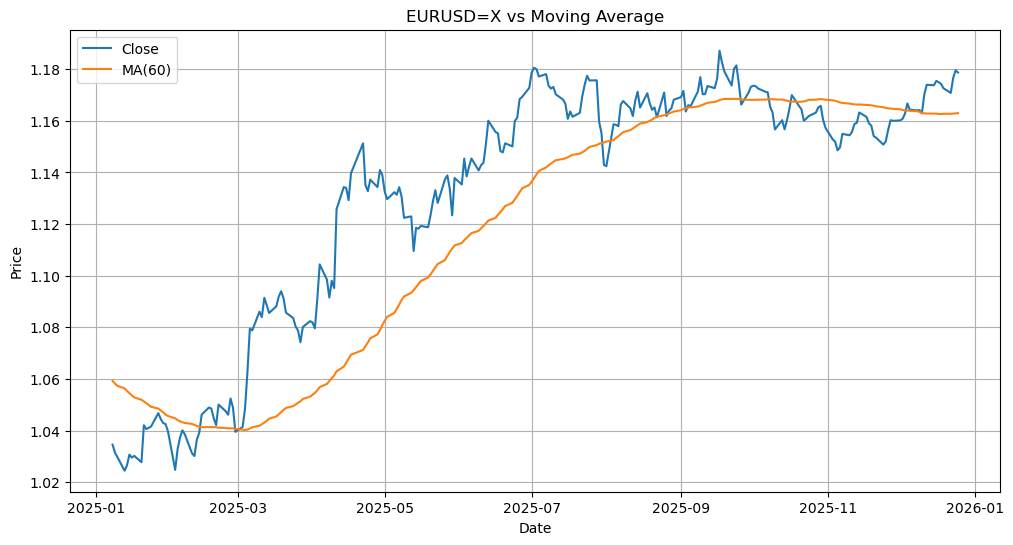

In [136]:
#slice to last 500 rows
df_plot = df.iloc[-250:, :]

# Plot
plt.figure(figsize=(12, 6))
plt.title(f"{ticker} vs Moving Average")
plt.plot(df_plot.index, df_plot["Close"], label='Close')
plt.plot(df_plot.index, df_plot["MA"], label=f'MA({window})')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)